In [1]:
!pip install altair
!pip install -i https://pypi.douban.com/simple matplotlib==3.0.3


  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
Looking in indexes: https://pypi.douban.com/simple
     |████████████████████████████████| 36.6 MB 70 kB/s  eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.9 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-i69w9q6r/matplotlib_36b5581cfb04457aa7c0104e202d4a1e/setup.py'"'"'; __file__='"'"'/tmp/pip-install-i69w9q6r/matplotlib_36b5581cfb04457aa7c0104e202d4a1e/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-cz71xgy2
       cwd: /tmp/pip-install-i69w9q6r/matplotlib_36b5581cfb04457aa7c0104e202d4a1e/
  Complete output (566 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
              matplotlib: yes [3.0.3]
                  python: yes [3.9.2 | packaged by conda-forge | (default, 

In [4]:
import csv
import pandas as pd
import altair as alt
import seaborn as sns
from pandas import Series,DataFrame
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


#change format for large data for alt library
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [5]:
url='https://www.opendata.nhs.scot/dataset/6dbdd466-45e3-4348-9ee3-1eac72b5a592/resource/9b99e278-b8d8-47df-8d7a-a8cf98519ac1/download/daily_vacc_age_sex_20211125.csv'
data= pd.read_csv(url)
data.head(20)

Date    Country     Sex SexQF           AgeGroup AgeGroupQF  \
0   20201208  S92000003  Female   NaN           12 to 15        NaN   
1   20201208  S92000003  Female   NaN           12 to 15        NaN   
2   20201208  S92000003  Female   NaN           12 to 15        NaN   
3   20201208  S92000003  Female   NaN  12 years and over          d   
4   20201208  S92000003  Female   NaN  12 years and over          d   
5   20201208  S92000003  Female   NaN  12 years and over          d   
6   20201208  S92000003  Female   NaN           16 to 17        NaN   
7   20201208  S92000003  Female   NaN           16 to 17        NaN   
8   20201208  S92000003  Female   NaN           16 to 17        NaN   
9   20201208  S92000003  Female   NaN           18 to 29        NaN   
10  20201208  S92000003  Female   NaN           18 to 29        NaN   
11  20201208  S92000003  Female   NaN           18 to 29        NaN   
12  20201208  S92000003  Female   NaN           30 to 39        NaN   
13  20201208  S92000003  Female   NaN           30 to 39        NaN   
14  20201208  S92000003  Female   NaN           30 to 39        NaN   
15  20201208  S92000003  Female   NaN           40 to 49        NaN   
16  20201208  S92000003  Female   NaN           40 to 49        NaN   
17  20201208  S92000003  Female   NaN           40 to 49        NaN   
18  20201208  S92000003  Female   NaN           50 to 54        NaN   
19  20201208  S92000003  Female   NaN           50 to 54        NaN   

    Population  PopulationQF                Dose  DoseQF  NumberVaccinated  \
0     114486.0           NaN              Dose 1     NaN                 0   
1     114486.0           NaN              Dose 2     NaN                 0   
2     114486.0           NaN  Dose 3 and Booster     NaN                 0   
3    2468498.0           NaN              Dose 1     NaN              1525   
4    2468498.0           NaN              Dose 2     NaN                 0   
5    2468498.0           NaN  Dose 3 and Booster     NaN                 0   
6      53579.0           NaN              Dose 1     NaN                 0   
7      53579.0           NaN              Dose 2     NaN                 0   
8      53579.0           NaN  Dose 3 and Booster     NaN                 0   
9     413185.0           NaN              Dose 1     NaN               168   
10    413185.0           NaN              Dose 2     NaN                 0   
11    413185.0           NaN  Dose 3 and Booster     NaN                 0   
12    370019.0           NaN              Dose 1     NaN               295   
13    370019.0           NaN              Dose 2     NaN                 0   
14    370019.0           NaN  Dose 3 and Booster     NaN                 0   
15    345328.0           NaN              Dose 1     NaN               395   
16    345328.0           NaN              Dose 2     NaN                 0   
17    345328.0           NaN  Dose 3 and Booster     NaN                 0   
18    203758.0           NaN              Dose 1     NaN               231   
19    203758.0           NaN              Dose 2     NaN                 0   

    NumberVaccinatedQF  PercentCoverage PercentCoverageQF  \
0                  NaN         0.000000               NaN   
1                  NaN         0.000000               NaN   
2                  NaN         0.000000               NaN   
3                  NaN         0.061778               NaN   
4                  NaN         0.000000               NaN   
5                  NaN         0.000000               NaN   
6                  NaN         0.000000               NaN   
7                  NaN         0.000000               NaN   
8                  NaN         0.000000               NaN   
9                  NaN         0.040660               NaN   
10                 NaN         0.000000               NaN   
11                 NaN         0.000000               NaN   
12                 NaN         0.079726               NaN   
13                 NaN 

In [6]:
# # Delete useless values 0
# df=data.drop(data[data['NumberVaccinated']==0 ].index)
# # df

In [7]:
#change "time" format

data['Date']=pd.to_datetime(data['Date'], format='%Y%m%d')
# df['Date']

In [8]:
#select our target age group
dff=data[(data.AgeGroup == '18 to 29') & (data.Sex=='Total')]

dff

# Age=data.groupby('AgeGroup')['NumberVaccinated'].sum()
# print(Age)


Date    Country    Sex SexQF  AgeGroup AgeGroupQF  Population  \
87    2020-12-08  S92000003  Total     d  18 to 29        NaN    833947.0   
88    2020-12-08  S92000003  Total     d  18 to 29        NaN    833947.0   
89    2020-12-08  S92000003  Total     d  18 to 29        NaN    833947.0   
213   2020-12-09  S92000003  Total     d  18 to 29        NaN    833947.0   
214   2020-12-09  S92000003  Total     d  18 to 29        NaN    833947.0   
...          ...        ...    ...   ...       ...        ...         ...   
45448 2021-12-03  S92000003  Total     d  18 to 29        NaN    833947.0   
45449 2021-12-03  S92000003  Total     d  18 to 29        NaN    833947.0   
45573 2021-12-04  S92000003  Total     d  18 to 29        NaN    833947.0   
45574 2021-12-04  S92000003  Total     d  18 to 29        NaN    833947.0   
45575 2021-12-04  S92000003  Total     d  18 to 29        NaN    833947.0   

       PopulationQF                Dose  DoseQF  NumberVaccinated  \
87              NaN              Dose 1     NaN               206   
88              NaN              Dose 2     NaN                 0   
89              NaN  Dose 3 and Booster     NaN                 0   
213             NaN              Dose 1     NaN               545   
214             NaN              Dose 2     NaN                 0   
...             ...                 ...     ...               ...   
45448           NaN              Dose 2     NaN               416   
45449           NaN  Dose 3 and Booster     NaN              1553   
45573           NaN              Dose 1     NaN               151   
45574           NaN              Dose 2     NaN               331   
45575           NaN  Dose 3 and Booster     NaN              1695   

       NumberVaccinatedQF  PercentCoverage PercentCoverageQF  \
87                    NaN         0.024702               NaN   
88                    NaN         0.000000               NaN   
89                    NaN         0.000000               NaN   
213                   NaN         0.065352               NaN   
214                   NaN         0.000000               NaN   
...                   ...              ...               ...   
45448                 NaN         0.049883               NaN   
45449                 NaN         0.186223               NaN   
45573                 NaN         0.018107               NaN   
45574                 NaN         0.039691               NaN   
45575                 NaN         0.203250               NaN   

       CumulativeNumberVaccinated  CumulativeNumberVaccinatedQF  \
87                            206                           NaN   
88                              0                           NaN   
89                              0                           NaN   
213                           751                           NaN   
214                             0                           NaN   
...                           ...                           ...   
45448                      584165                           NaN   
45449                       59057                           NaN   
45573                      660535                           NaN   
45574                      584496                           NaN   
45575                       60752                           NaN   

       CumulativePercentCoverage CumulativePercentCoverageQF  
87                      0.024702                         NaN  
88                      0.000000                         NaN  
89                      0.000000                         NaN  
213                     0.090054                         NaN  
214                     0.000000                         NaN  
...                          ...                         ...  
45448                  70.048216                         NaN  
45449                   7.081625                         NaN  
45573                  79.205873                         NaN  
45574                  70.087907                      

In [9]:
#choice time

def limitime(data,start,end):
    data = data[(data['Date'] >=pd.to_datetime(start)) & (data['Date'] <= pd.to_datetime(end))]
    return data


In [10]:
#chose data
data0=limitime(dff,'20201105','20201215')
data1=limitime(dff,'20201208','20210104')
data2=limitime(dff,'20210104','20210402')
data3=limitime(dff,'20210402','20210526')
data4=limitime(dff,'20210402','20210702')
data5=limitime(dff,'20210702','20210920')
data6=limitime(dff,'20210920','20211001')
data7=limitime(dff,'20211001','20211004')
data8=limitime(dff,'20211004','20211025')
data9=limitime(dff,'20211025','20211125')

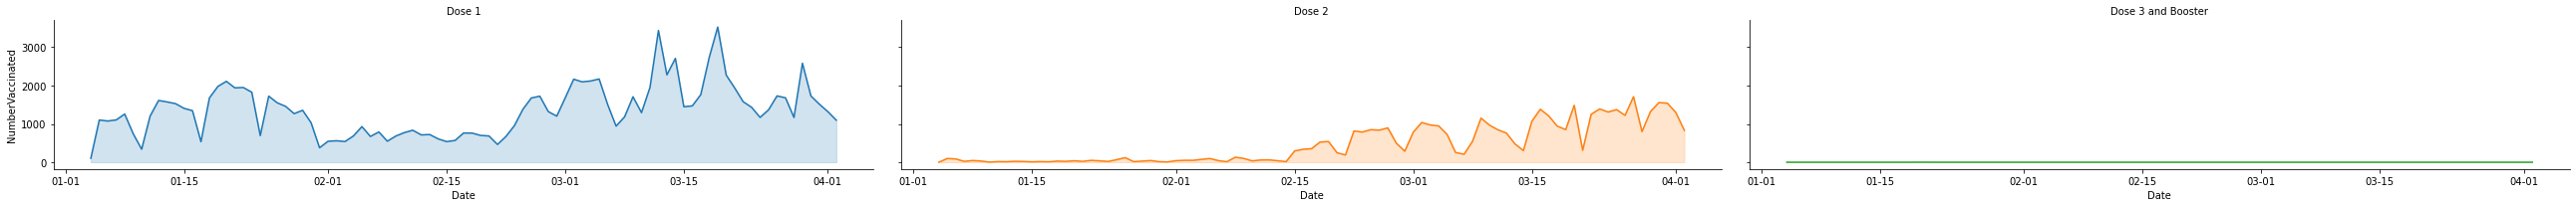

In [13]:

# Creating and initializing a grid 
plot = sns.FacetGrid(data2, col='Dose', hue='Dose', height=3,aspect=4 )

# using plot function to add line over the area   
plot.map(plt.plot, 'Date', 'NumberVaccinated')
# plot.set_xticklabels(data3.Date,rotation=45)

# using fill_between to Fill the area 
plot.map(plt.fill_between, 'Date', 'NumberVaccinated', alpha=0.2).set_titles("{col_name} Dose")

# Controlling the title of each facet
plot = plot.set_titles("{col_name}")


ax = plt.gca()  
date_format = mpl.dates.DateFormatter("%m-%d")  
ax.xaxis.set_major_formatter(date_format) 
# plt.xticks(rotation=90) 


# 控制x轴显示日期的间隔天数（如一周7天）
xlocator = mpl.ticker.MultipleLocator(7)
# ax.xaxis.set_major_locator(xlocator)
# fig.set_size_inches(20,20)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
# plt.gcf().autofmt_xdate() # 自动旋转日期标记

# Show the graph
plt.show()


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


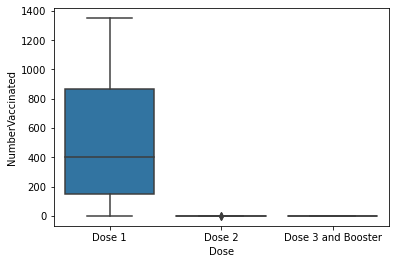

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dose', ylabel='NumberVaccinated'>

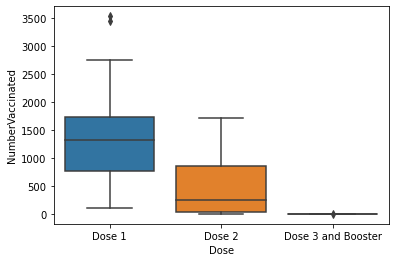

In [14]:
sns.boxplot(data1['Dose'],data1['NumberVaccinated'])
plt.show()
sns.boxplot(data2['Dose'],data2['NumberVaccinated'])



No handles with labels found to put in legend.


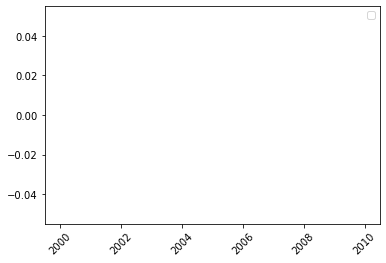

In [17]:
data1=limitime(dff,'20221001','20211125')

dataf1=data1.groupby('Date')['NumberVaccinated'].sum()
# dataf11=data1.groupby('Date')['NumberVaccinated'].mean()


# plt.bar(data['Date'], data1['NumberVaccinated'],color='b')
# plt.xticks(rotation=45) 
# dataf1[1:]
# plt.bar(dataf1['Date'], dataf1['NumberVaccinated'])

# plt.bar(dataf1.index,dataf1)
plt.xticks(rotation=45) 
# plt.grid()

plt.plot(dataf1.index,dataf1)
# l_tip=sns.distplot(tip,kde=True,color='g',label='tip')
# l_totalbill=sns.distplot(dataf1,kde=True,color='b',label='total bill')
plt.legend()
plt.show()




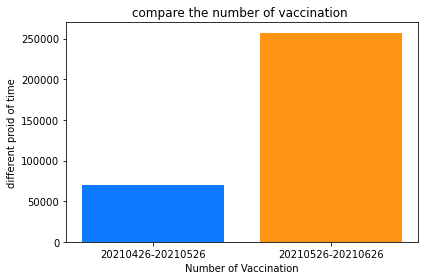

In [18]:
data3=limitime(dff,'20210426','20210526')
data4=limitime(dff,'20210526','20210626')
datasum1=data3['NumberVaccinated'].sum()
datasum2=data4['NumberVaccinated'].sum()
# f, ax = plt.subplots(figsize=(6, 5))
# datasum1
# plt.bar(datasum1.index,dataf1)
# plt.xticks(rotation=45) 
# plt.grid()

data = {'data':['20210426-20210526','20210526-20210626'],
       'VacSum':[datasum1,datasum2],
       }
df = DataFrame(data)
# print(df)
color=['#0b7aff','#ff9312']
plt.bar(df['data'],df['VacSum'],color=color)
# plt.xticks(rotation=45) 

plt.title("compare the number of vaccination ")
plt.xlabel('Number of Vaccination')
plt.ylabel('different proid of time')
plt.tight_layout()
plt.savefig('graph3.png',transparent = True)


(array([18809., 18823., 18840., 18854., 18871., 18885.]),
 [Text(18809.0, 0, '2021-07-01'),
  Text(18823.0, 0, '2021-07-15'),
  Text(18840.0, 0, '2021-08-01'),
  Text(18854.0, 0, '2021-08-15'),
  Text(18871.0, 0, '2021-09-01'),
  Text(18885.0, 0, '2021-09-15')])

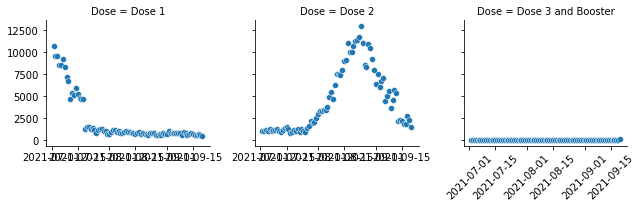

In [19]:
g = sns.FacetGrid(data5, col="Dose", margin_titles=True)
# g = sns.FacetGrid(data5, margin_titles=True)


plt.xticks(rotation=45) 
g.map_dataframe(sns.scatterplot, x="Date", y="NumberVaccinated")
plt.xticks(rotation=45) 




([<matplotlib.patches.Wedge at 0x7fd7c74ea610>,
 [Text(0.9363615099306977, 0.5772582807723975, 'Dose 1'),
  Text(-1.0696431192787708, 0.2566390410276298, 'Dose 2'),
  Text(0.7758415590564807, -0.7797883528501882, 'Dose 3')],
 [Text(0.5107426417803804, 0.3148681531485804, '17.6%'),
  Text(-0.583441701424784, 0.13998493146961624, '57.3%'),
  Text(0.4231863049398985, -0.42533910155464805, '25.1%')])

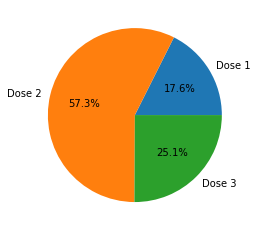

In [20]:
#pie chart
dataf2=data6.groupby('Dose')['NumberVaccinated'].sum()
labels = ['Dose 1','Dose 2','Dose 3']
plt.pie(x = dataf2, labels=labels,autopct='%1.1f%%')

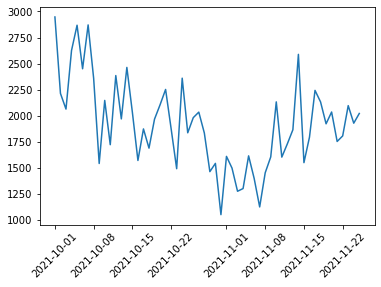

In [21]:
data5=limitime(dff,'20211001','20211125')

dataf5=data5.groupby('Date')['NumberVaccinated'].sum()
# dataf4
plt.plot(dataf5.index,dataf5)
plt.xticks(rotation=45) 
plt.grid(False)



No handles with labels found to put in legend.


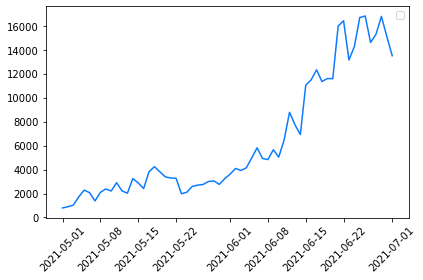

In [22]:
data1=limitime(dff,'20210501','20210701')
dataf1=data1.groupby('Date')['NumberVaccinated'].sum()
plt.xlabel=('number of vaccination')
# dataf4
plt.plot(dataf1.index,dataf1,color='#0b7aff')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('graph3.png',transparent = True)
plt.legend()
plt.show()

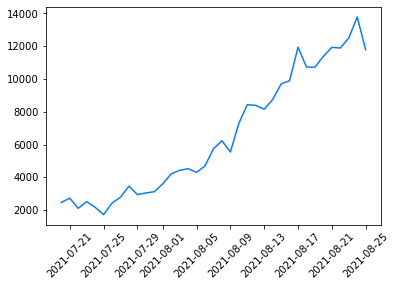

In [23]:
data5=limitime(dff,'20210720','20210825')

dataf5=data5.groupby('Date')['NumberVaccinated'].sum()
# dataf4
plt.plot(dataf5.index,dataf5,color='#0b7aff')
plt.xticks(rotation=45) 
plt.savefig('graph11.png',transparent = True)



# plt.savefig('graph.png',transparent = True)


# brush = alt.selection(type='interval')

# data_all=data[data.AgeBand != 'All vaccinations']
# data_all['Date']=pd.to_datetime(data_all['Date'], format='%Y%m%d')



# data5['Date']
# points = alt.Chart().mark_point().encode(
#     alt.X('Date', title='Date'),
#     alt.Y('NumberVaccinated', title='Number vaccinated'),
#     color=alt.condition(brush, 'Dose', alt.value('lightgray'))
# ).properties(
#     width=600,
#     height=400
# ).add_selection(
#     brush
# )

# alt.vconcat(points, data=data5)




In [24]:
import altair as alt

data3=limitime(dff,'20201202','20210726')
source = data3

alt.Chart(source).mark_area().mark_rule(strokeWidth=2,color='gray',opacity=0.5).encode(
    x='Date:T',
    y='NumberVaccinated:Q',
    color='Dose:N',
    row=alt.Row('Dose:N', sort=['Dose 1', 'Dose 2', 'Dose 3'])
).properties(height=100, width=700)



alt.Chart(...)

In [25]:
brush = alt.selection(type='interval')
data4=limitime(dff,'20210402','20210702')

# data_all=data[data.AgeBand != 'All vaccinations']
# data_all['Date']=pd.to_datetime(data_all['Date'], format='%Y%m%d')
data4['Date']
points = alt.Chart().mark_point().encode(
    alt.X('Date', title='Date'),
    alt.Y('NumberVaccinated', title='Number vaccinated'),
    color=alt.condition(brush, 'Dose', alt.value('lightgray'))
).properties(
    width=600,
    height=400
).add_selection(
    brush
)

alt.vconcat(points, data=data4)

# plt.savefig('graph.png',transparent = True)


alt.VConcatChart(...)